In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%matplotlib inline

In [4]:
import torch
torch.cuda.set_device(1)

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz')

In [7]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100, embedding_dim=2)

01/25/2020 00:41:33 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:41:35 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:41:38 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Fin

01/25/2020 00:42:29 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control06_run4_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:42:31 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control07_run3_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:42:34 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control07_run2_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/

01/25/2020 00:43:24 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control12_run5_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:43:26 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control12_run4_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:43:28 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control13_run3_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/

01/25/2020 00:44:19 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control18_run2_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:44:22 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control18_run4_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:44:24 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control18_run5_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_

01/25/2020 00:45:15 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-mdd04_run1_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:45:17 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-mdd04_run2_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:45:20 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-mdd04_run5_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/s

01/25/2020 00:46:11 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-mdd10_run3_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:46:13 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-mdd10_run2_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:46:16 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-mdd10_run4_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/soun

01/25/2020 00:47:07 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-mdd15_run5_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:47:09 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-mdd16_run1_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/25/2020 00:47:12 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-mdd16_run2_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mas

In [8]:
dtfa.num_blocks

618

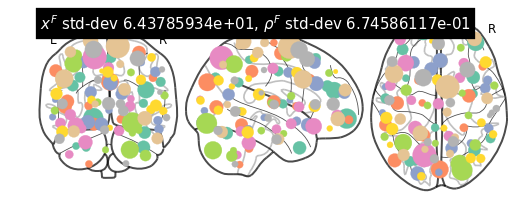

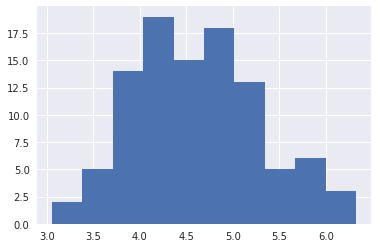

(<nilearn.plotting.displays.OrthoProjector at 0x7f06ac37d8d0>,
 tensor([[-2.3255e+01, -7.6349e+01, -3.9775e+01],
         [ 3.6907e+01, -5.4052e+00,  6.5581e+00],
         [-5.5330e+01, -1.0273e+01,  4.0796e+01],
         [-3.2161e+00, -4.1018e+01,  5.2909e+01],
         [-1.5797e+01,  6.1593e+01, -8.9048e+00],
         [ 5.5082e+01, -5.2226e+01,  2.9106e+01],
         [ 2.8507e+00,  2.9090e+01,  5.4553e+01],
         [-2.9864e+01, -7.6489e+01,  3.3926e+01],
         [-3.3894e+01,  1.0988e+01, -3.8339e+01],
         [ 3.8220e+01, -6.4618e+01, -2.4195e+01],
         [ 3.7035e+01,  1.2032e+01, -3.9668e+01],
         [ 3.9600e+01,  4.8491e+01,  2.0759e+01],
         [-3.7391e+01,  4.1354e+01,  2.5263e+01],
         [-1.5065e+01, -4.9018e+01, -1.5406e+01],
         [ 4.6965e+01,  2.3356e+01,  3.3425e+01],
         [ 1.7008e+00, -8.5010e+01,  2.9318e+01],
         [-2.0363e+01, -5.1055e+01, -5.7284e+01],
         [-4.3066e+01, -1.5173e+01,  8.5935e+00],
         [-5.5269e+01, -3.8161e+01,  

In [9]:
dtfa.visualize_factor_embedding()

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=True, blocks_filter=lepping_db.inference_filter(training=True, held_out_tasks=set(['tones', 'response'])))

01/25/2020 00:49:33 [Epoch 1] (14980ms) Posterior free-energy 5.86695424e+08 = KL from prior 6.51881250e+05 - log-likelihood -5.86043584e+08
01/25/2020 00:49:33 Saving checkpoint...
01/25/2020 00:49:48 [Epoch 2] (14649ms) Posterior free-energy 5.71163200e+08 = KL from prior 6.28586375e+05 - log-likelihood -5.70534592e+08
01/25/2020 00:50:02 [Epoch 3] (14278ms) Posterior free-energy 5.58964736e+08 = KL from prior 6.09385312e+05 - log-likelihood -5.58355392e+08
01/25/2020 00:50:16 [Epoch 4] (14193ms) Posterior free-energy 5.49234560e+08 = KL from prior 5.93939438e+05 - log-likelihood -5.48640640e+08
01/25/2020 00:50:30 [Epoch 5] (14211ms) Posterior free-energy 5.42133888e+08 = KL from prior 5.75765438e+05 - log-likelihood -5.41558208e+08
01/25/2020 00:50:45 [Epoch 6] (14303ms) Posterior free-energy 5.34382944e+08 = KL from prior 5.59731625e+05 - log-likelihood -5.33823200e+08
01/25/2020 00:50:59 [Epoch 7] (14343ms) Posterior free-energy 5.27189856e+08 = KL from prior 5.48790188e+05 - log

01/25/2020 01:03:31 [Epoch 59] (14515ms) Posterior free-energy 2.84369568e+08 = KL from prior 6.01948250e+05 - log-likelihood -2.83767616e+08
01/25/2020 01:03:46 [Epoch 60] (14355ms) Posterior free-energy 2.81141504e+08 = KL from prior 6.05289188e+05 - log-likelihood -2.80536224e+08
01/25/2020 01:04:00 [Epoch 61] (14545ms) Posterior free-energy 2.78238816e+08 = KL from prior 6.12145250e+05 - log-likelihood -2.77626656e+08
01/25/2020 01:04:15 [Epoch 62] (14560ms) Posterior free-energy 2.77325632e+08 = KL from prior 6.16253188e+05 - log-likelihood -2.76709344e+08
01/25/2020 01:04:29 [Epoch 63] (14342ms) Posterior free-energy 2.75348224e+08 = KL from prior 6.20748625e+05 - log-likelihood -2.74727488e+08
01/25/2020 01:04:44 [Epoch 64] (14651ms) Posterior free-energy 2.72744736e+08 = KL from prior 6.24010812e+05 - log-likelihood -2.72120672e+08
01/25/2020 01:04:58 [Epoch 65] (14407ms) Posterior free-energy 2.70386816e+08 = KL from prior 6.29114438e+05 - log-likelihood -2.69757664e+08
01/25/

01/25/2020 01:17:29 [Epoch 117] (14462ms) Posterior free-energy 2.14188480e+08 = KL from prior 6.28176188e+05 - log-likelihood -2.13560320e+08
01/25/2020 01:17:44 [Epoch 118] (14444ms) Posterior free-energy 2.13371168e+08 = KL from prior 6.22828188e+05 - log-likelihood -2.12748368e+08
01/25/2020 01:17:58 [Epoch 119] (14468ms) Posterior free-energy 2.12950048e+08 = KL from prior 6.17917562e+05 - log-likelihood -2.12332176e+08
01/25/2020 01:18:13 [Epoch 120] (14577ms) Posterior free-energy 2.13032864e+08 = KL from prior 6.14020438e+05 - log-likelihood -2.12418832e+08
01/25/2020 01:18:27 [Epoch 121] (14639ms) Posterior free-energy 2.11962944e+08 = KL from prior 6.11551562e+05 - log-likelihood -2.11351360e+08
01/25/2020 01:18:42 [Epoch 122] (14657ms) Posterior free-energy 2.11252048e+08 = KL from prior 6.08472125e+05 - log-likelihood -2.10643584e+08
01/25/2020 01:18:56 [Epoch 123] (14376ms) Posterior free-energy 2.10849936e+08 = KL from prior 6.04203812e+05 - log-likelihood -2.10245712e+08

01/25/2020 01:31:27 [Epoch 175] (14521ms) Posterior free-energy 1.99582400e+08 = KL from prior 6.08508750e+05 - log-likelihood -1.98973920e+08
01/25/2020 01:31:42 [Epoch 176] (14477ms) Posterior free-energy 1.99386096e+08 = KL from prior 6.09721750e+05 - log-likelihood -1.98776352e+08
01/25/2020 01:31:56 [Epoch 177] (14434ms) Posterior free-energy 1.99249200e+08 = KL from prior 6.09609688e+05 - log-likelihood -1.98639584e+08
01/25/2020 01:32:11 [Epoch 178] (14482ms) Posterior free-energy 1.99349920e+08 = KL from prior 6.09397750e+05 - log-likelihood -1.98740528e+08
01/25/2020 01:32:25 [Epoch 179] (14351ms) Posterior free-energy 1.99095264e+08 = KL from prior 6.10762875e+05 - log-likelihood -1.98484512e+08
01/25/2020 01:32:40 [Epoch 180] (14502ms) Posterior free-energy 1.98959824e+08 = KL from prior 6.11765562e+05 - log-likelihood -1.98348032e+08
01/25/2020 01:32:54 [Epoch 181] (14401ms) Posterior free-energy 1.98967376e+08 = KL from prior 6.12248875e+05 - log-likelihood -1.98355168e+08

01/25/2020 01:45:27 [Epoch 233] (14342ms) Posterior free-energy 1.94539040e+08 = KL from prior 6.33569938e+05 - log-likelihood -1.93905472e+08
01/25/2020 01:45:42 [Epoch 234] (14462ms) Posterior free-energy 1.94519856e+08 = KL from prior 6.33756875e+05 - log-likelihood -1.93886128e+08
01/25/2020 01:45:56 [Epoch 235] (14411ms) Posterior free-energy 1.94455312e+08 = KL from prior 6.34602688e+05 - log-likelihood -1.93820688e+08
01/25/2020 01:46:11 [Epoch 236] (14355ms) Posterior free-energy 1.94478800e+08 = KL from prior 6.33413625e+05 - log-likelihood -1.93845328e+08
01/25/2020 01:46:25 [Epoch 237] (14522ms) Posterior free-energy 1.94445360e+08 = KL from prior 6.34258375e+05 - log-likelihood -1.93811088e+08
01/25/2020 01:46:40 [Epoch 238] (14475ms) Posterior free-energy 1.94359024e+08 = KL from prior 6.34820312e+05 - log-likelihood -1.93724192e+08
01/25/2020 01:46:54 [Epoch 239] (14310ms) Posterior free-energy 1.94346688e+08 = KL from prior 6.34326562e+05 - log-likelihood -1.93712336e+08

01/25/2020 01:59:26 [Epoch 291] (14593ms) Posterior free-energy 1.92098240e+08 = KL from prior 6.41408188e+05 - log-likelihood -1.91456832e+08
01/25/2020 01:59:40 [Epoch 292] (14481ms) Posterior free-energy 1.92040368e+08 = KL from prior 6.41955750e+05 - log-likelihood -1.91398448e+08
01/25/2020 01:59:55 [Epoch 293] (14416ms) Posterior free-energy 1.92125216e+08 = KL from prior 6.41106188e+05 - log-likelihood -1.91484096e+08
01/25/2020 02:00:09 [Epoch 294] (14536ms) Posterior free-energy 1.92036960e+08 = KL from prior 6.41408250e+05 - log-likelihood -1.91395536e+08
01/25/2020 02:00:24 [Epoch 295] (14484ms) Posterior free-energy 1.92037616e+08 = KL from prior 6.41612812e+05 - log-likelihood -1.91396000e+08
01/25/2020 02:00:38 [Epoch 296] (14523ms) Posterior free-energy 1.91949888e+08 = KL from prior 6.41539500e+05 - log-likelihood -1.91308352e+08
01/25/2020 02:00:53 [Epoch 297] (14529ms) Posterior free-energy 1.91896352e+08 = KL from prior 6.42069688e+05 - log-likelihood -1.91254256e+08

01/25/2020 02:13:26 [Epoch 349] (14631ms) Posterior free-energy 1.90595152e+08 = KL from prior 6.42173438e+05 - log-likelihood -1.89952992e+08
01/25/2020 02:13:40 [Epoch 350] (14544ms) Posterior free-energy 1.90583264e+08 = KL from prior 6.42232562e+05 - log-likelihood -1.89941040e+08
01/25/2020 02:13:55 [Epoch 351] (14487ms) Posterior free-energy 1.90504160e+08 = KL from prior 6.41604062e+05 - log-likelihood -1.89862576e+08
01/25/2020 02:14:09 [Epoch 352] (14508ms) Posterior free-energy 1.90551952e+08 = KL from prior 6.42602062e+05 - log-likelihood -1.89909360e+08
01/25/2020 02:14:24 [Epoch 353] (14562ms) Posterior free-energy 1.90508944e+08 = KL from prior 6.42841562e+05 - log-likelihood -1.89866096e+08
01/25/2020 02:14:39 [Epoch 354] (14551ms) Posterior free-energy 1.90463808e+08 = KL from prior 6.41660000e+05 - log-likelihood -1.89822128e+08
01/25/2020 02:14:53 [Epoch 355] (14583ms) Posterior free-energy 1.90475088e+08 = KL from prior 6.42634750e+05 - log-likelihood -1.89832448e+08

01/25/2020 02:27:26 [Epoch 407] (14326ms) Posterior free-energy 1.89522768e+08 = KL from prior 6.39992312e+05 - log-likelihood -1.88882784e+08
01/25/2020 02:27:40 [Epoch 408] (14338ms) Posterior free-energy 1.89485552e+08 = KL from prior 6.38244688e+05 - log-likelihood -1.88847344e+08
01/25/2020 02:27:55 [Epoch 409] (14361ms) Posterior free-energy 1.89488800e+08 = KL from prior 6.37953188e+05 - log-likelihood -1.88850864e+08
01/25/2020 02:28:09 [Epoch 410] (14464ms) Posterior free-energy 1.89411616e+08 = KL from prior 6.38983375e+05 - log-likelihood -1.88772656e+08
01/25/2020 02:28:23 [Epoch 411] (14411ms) Posterior free-energy 1.89472768e+08 = KL from prior 6.39028375e+05 - log-likelihood -1.88833744e+08
01/25/2020 02:28:38 [Epoch 412] (14517ms) Posterior free-energy 1.89400144e+08 = KL from prior 6.39824188e+05 - log-likelihood -1.88760304e+08
01/25/2020 02:28:52 [Epoch 413] (14353ms) Posterior free-energy 1.89444512e+08 = KL from prior 6.37685312e+05 - log-likelihood -1.88806816e+08

01/25/2020 02:41:25 [Epoch 465] (14568ms) Posterior free-energy 1.88827184e+08 = KL from prior 6.32795750e+05 - log-likelihood -1.88194304e+08
01/25/2020 02:41:39 [Epoch 466] (14462ms) Posterior free-energy 1.88800320e+08 = KL from prior 6.34411562e+05 - log-likelihood -1.88165936e+08
01/25/2020 02:41:53 [Epoch 467] (14449ms) Posterior free-energy 1.88852288e+08 = KL from prior 6.34174875e+05 - log-likelihood -1.88218128e+08
01/25/2020 02:42:08 [Epoch 468] (14448ms) Posterior free-energy 1.88826448e+08 = KL from prior 6.33825312e+05 - log-likelihood -1.88192640e+08
01/25/2020 02:42:22 [Epoch 469] (14464ms) Posterior free-energy 1.88833216e+08 = KL from prior 6.32585812e+05 - log-likelihood -1.88200656e+08
01/25/2020 02:42:37 [Epoch 470] (14518ms) Posterior free-energy 1.88718448e+08 = KL from prior 6.33476125e+05 - log-likelihood -1.88084944e+08
01/25/2020 02:42:51 [Epoch 471] (14461ms) Posterior free-energy 1.88719008e+08 = KL from prior 6.33306688e+05 - log-likelihood -1.88085744e+08

01/25/2020 02:55:24 [Epoch 523] (14550ms) Posterior free-energy 1.88205888e+08 = KL from prior 6.29138312e+05 - log-likelihood -1.87576704e+08
01/25/2020 02:55:38 [Epoch 524] (14310ms) Posterior free-energy 1.88228576e+08 = KL from prior 6.28142312e+05 - log-likelihood -1.87600432e+08
01/25/2020 02:55:52 [Epoch 525] (14298ms) Posterior free-energy 1.88206288e+08 = KL from prior 6.28668188e+05 - log-likelihood -1.87577632e+08
01/25/2020 02:56:07 [Epoch 526] (14317ms) Posterior free-energy 1.88217920e+08 = KL from prior 6.27700688e+05 - log-likelihood -1.87590208e+08
01/25/2020 02:56:21 [Epoch 527] (14375ms) Posterior free-energy 1.88216016e+08 = KL from prior 6.28096562e+05 - log-likelihood -1.87587968e+08
01/25/2020 02:56:35 [Epoch 528] (14406ms) Posterior free-energy 1.88226560e+08 = KL from prior 6.29137750e+05 - log-likelihood -1.87597392e+08
01/25/2020 02:56:50 [Epoch 529] (14518ms) Posterior free-energy 1.88233520e+08 = KL from prior 6.27931688e+05 - log-likelihood -1.87605616e+08

01/25/2020 03:09:22 [Epoch 581] (14510ms) Posterior free-energy 1.87795552e+08 = KL from prior 6.23584938e+05 - log-likelihood -1.87171984e+08
01/25/2020 03:09:37 [Epoch 582] (14509ms) Posterior free-energy 1.87778960e+08 = KL from prior 6.23875688e+05 - log-likelihood -1.87155072e+08
01/25/2020 03:09:51 [Epoch 583] (14498ms) Posterior free-energy 1.87781840e+08 = KL from prior 6.23492438e+05 - log-likelihood -1.87158336e+08
01/25/2020 03:10:05 [Epoch 584] (14392ms) Posterior free-energy 1.87792352e+08 = KL from prior 6.22868188e+05 - log-likelihood -1.87169440e+08
01/25/2020 03:10:20 [Epoch 585] (14483ms) Posterior free-energy 1.87788000e+08 = KL from prior 6.22870375e+05 - log-likelihood -1.87165152e+08
01/25/2020 03:10:35 [Epoch 586] (14582ms) Posterior free-energy 1.87747664e+08 = KL from prior 6.23334500e+05 - log-likelihood -1.87124320e+08
01/25/2020 03:10:49 [Epoch 587] (14493ms) Posterior free-energy 1.87752704e+08 = KL from prior 6.22464438e+05 - log-likelihood -1.87130224e+08

01/25/2020 03:23:21 [Epoch 639] (14396ms) Posterior free-energy 1.87386208e+08 = KL from prior 6.17977062e+05 - log-likelihood -1.86768240e+08
01/25/2020 03:23:35 [Epoch 640] (14361ms) Posterior free-energy 1.87411680e+08 = KL from prior 6.17760188e+05 - log-likelihood -1.86793888e+08
01/25/2020 03:23:50 [Epoch 641] (14466ms) Posterior free-energy 1.87390000e+08 = KL from prior 6.17307125e+05 - log-likelihood -1.86772688e+08
01/25/2020 03:24:04 [Epoch 642] (14410ms) Posterior free-energy 1.87422896e+08 = KL from prior 6.16849188e+05 - log-likelihood -1.86806048e+08
01/25/2020 03:24:19 [Epoch 643] (14580ms) Posterior free-energy 1.87391664e+08 = KL from prior 6.17653562e+05 - log-likelihood -1.86774032e+08
01/25/2020 03:24:33 [Epoch 644] (14439ms) Posterior free-energy 1.87420688e+08 = KL from prior 6.16164625e+05 - log-likelihood -1.86804512e+08
01/25/2020 03:24:48 [Epoch 645] (14321ms) Posterior free-energy 1.87386736e+08 = KL from prior 6.17539438e+05 - log-likelihood -1.86769184e+08

01/25/2020 03:37:20 [Epoch 697] (14517ms) Posterior free-energy 1.87150176e+08 = KL from prior 6.11160500e+05 - log-likelihood -1.86539024e+08
01/25/2020 03:37:34 [Epoch 698] (14413ms) Posterior free-energy 1.87162576e+08 = KL from prior 6.12041375e+05 - log-likelihood -1.86550544e+08
01/25/2020 03:37:49 [Epoch 699] (14320ms) Posterior free-energy 1.87120224e+08 = KL from prior 6.11895062e+05 - log-likelihood -1.86508320e+08
01/25/2020 03:38:03 [Epoch 700] (14332ms) Posterior free-energy 1.87136512e+08 = KL from prior 6.11094562e+05 - log-likelihood -1.86525440e+08
01/25/2020 03:38:18 [Epoch 701] (14538ms) Posterior free-energy 1.87149600e+08 = KL from prior 6.12377062e+05 - log-likelihood -1.86537248e+08
01/25/2020 03:38:18 Saving checkpoint...
01/25/2020 03:38:32 [Epoch 702] (14398ms) Posterior free-energy 1.87140512e+08 = KL from prior 6.10844688e+05 - log-likelihood -1.86529680e+08
01/25/2020 03:38:46 [Epoch 703] (14389ms) Posterior free-energy 1.87131120e+08 = KL from prior 6.1090

01/25/2020 03:51:17 [Epoch 755] (14548ms) Posterior free-energy 1.86895072e+08 = KL from prior 6.05057125e+05 - log-likelihood -1.86290016e+08
01/25/2020 03:51:32 [Epoch 756] (14442ms) Posterior free-energy 1.86920928e+08 = KL from prior 6.06290000e+05 - log-likelihood -1.86314656e+08
01/25/2020 03:51:46 [Epoch 757] (14463ms) Posterior free-energy 1.86908160e+08 = KL from prior 6.06576625e+05 - log-likelihood -1.86301568e+08
01/25/2020 03:52:01 [Epoch 758] (14386ms) Posterior free-energy 1.86891536e+08 = KL from prior 6.05127938e+05 - log-likelihood -1.86286448e+08
01/25/2020 03:52:15 [Epoch 759] (14374ms) Posterior free-energy 1.86888112e+08 = KL from prior 6.05458188e+05 - log-likelihood -1.86282640e+08
01/25/2020 03:52:30 [Epoch 760] (14427ms) Posterior free-energy 1.86889968e+08 = KL from prior 6.05313312e+05 - log-likelihood -1.86284688e+08
01/25/2020 03:52:44 [Epoch 761] (14613ms) Posterior free-energy 1.86891984e+08 = KL from prior 6.05219188e+05 - log-likelihood -1.86286752e+08

01/25/2020 04:05:16 [Epoch 813] (14520ms) Posterior free-energy 1.86711344e+08 = KL from prior 5.99282500e+05 - log-likelihood -1.86112064e+08
01/25/2020 04:05:31 [Epoch 814] (14501ms) Posterior free-energy 1.86703728e+08 = KL from prior 6.00011500e+05 - log-likelihood -1.86103760e+08
01/25/2020 04:05:45 [Epoch 815] (14366ms) Posterior free-energy 1.86712496e+08 = KL from prior 5.99296312e+05 - log-likelihood -1.86113168e+08
01/25/2020 04:05:59 [Epoch 816] (14345ms) Posterior free-energy 1.86688864e+08 = KL from prior 6.00429250e+05 - log-likelihood -1.86088400e+08
01/25/2020 04:06:14 [Epoch 817] (14575ms) Posterior free-energy 1.86693408e+08 = KL from prior 6.00498312e+05 - log-likelihood -1.86092928e+08
01/25/2020 04:06:28 [Epoch 818] (14431ms) Posterior free-energy 1.86684528e+08 = KL from prior 5.98652625e+05 - log-likelihood -1.86085888e+08
01/25/2020 04:06:43 [Epoch 819] (14507ms) Posterior free-energy 1.86696112e+08 = KL from prior 5.99115688e+05 - log-likelihood -1.86097024e+08

01/25/2020 04:19:15 [Epoch 871] (14378ms) Posterior free-energy 1.86561136e+08 = KL from prior 5.93738375e+05 - log-likelihood -1.85967376e+08
01/25/2020 04:19:29 [Epoch 872] (14309ms) Posterior free-energy 1.86552432e+08 = KL from prior 5.94874562e+05 - log-likelihood -1.85957552e+08
01/25/2020 04:19:43 [Epoch 873] (14364ms) Posterior free-energy 1.86562448e+08 = KL from prior 5.95098188e+05 - log-likelihood -1.85967344e+08
01/25/2020 04:19:58 [Epoch 874] (14572ms) Posterior free-energy 1.86581056e+08 = KL from prior 5.95108938e+05 - log-likelihood -1.85985952e+08
01/25/2020 04:20:12 [Epoch 875] (14502ms) Posterior free-energy 1.86582288e+08 = KL from prior 5.93267125e+05 - log-likelihood -1.85989008e+08
01/25/2020 04:20:27 [Epoch 876] (14446ms) Posterior free-energy 1.86572208e+08 = KL from prior 5.94479938e+05 - log-likelihood -1.85977728e+08
01/25/2020 04:20:42 [Epoch 877] (14650ms) Posterior free-energy 1.86564704e+08 = KL from prior 5.93939062e+05 - log-likelihood -1.85970784e+08

01/25/2020 04:33:12 [Epoch 929] (14438ms) Posterior free-energy 1.86408176e+08 = KL from prior 5.89044125e+05 - log-likelihood -1.85819088e+08
01/25/2020 04:33:27 [Epoch 930] (14334ms) Posterior free-energy 1.86400368e+08 = KL from prior 5.88965125e+05 - log-likelihood -1.85811360e+08
01/25/2020 04:33:41 [Epoch 931] (14257ms) Posterior free-energy 1.86384480e+08 = KL from prior 5.89156875e+05 - log-likelihood -1.85795296e+08
01/25/2020 04:33:55 [Epoch 932] (14350ms) Posterior free-energy 1.86389200e+08 = KL from prior 5.88858938e+05 - log-likelihood -1.85800336e+08
01/25/2020 04:34:10 [Epoch 933] (14472ms) Posterior free-energy 1.86361360e+08 = KL from prior 5.89470562e+05 - log-likelihood -1.85771856e+08
01/25/2020 04:34:24 [Epoch 934] (14457ms) Posterior free-energy 1.86365456e+08 = KL from prior 5.87384688e+05 - log-likelihood -1.85778064e+08
01/25/2020 04:34:39 [Epoch 935] (14404ms) Posterior free-energy 1.86353072e+08 = KL from prior 5.88194125e+05 - log-likelihood -1.85764880e+08

01/25/2020 04:47:10 [Epoch 987] (14410ms) Posterior free-energy 1.86291616e+08 = KL from prior 5.82694000e+05 - log-likelihood -1.85708912e+08
01/25/2020 04:47:24 [Epoch 988] (14342ms) Posterior free-energy 1.86275328e+08 = KL from prior 5.83679375e+05 - log-likelihood -1.85691680e+08
01/25/2020 04:47:39 [Epoch 989] (14360ms) Posterior free-energy 1.86274640e+08 = KL from prior 5.84163438e+05 - log-likelihood -1.85690512e+08
01/25/2020 04:47:53 [Epoch 990] (14507ms) Posterior free-energy 1.86265184e+08 = KL from prior 5.84145562e+05 - log-likelihood -1.85681056e+08
01/25/2020 04:48:08 [Epoch 991] (14427ms) Posterior free-energy 1.86259072e+08 = KL from prior 5.82867438e+05 - log-likelihood -1.85676208e+08
01/25/2020 04:48:22 [Epoch 992] (14452ms) Posterior free-energy 1.86265328e+08 = KL from prior 5.83265938e+05 - log-likelihood -1.85682064e+08
01/25/2020 04:48:37 [Epoch 993] (14571ms) Posterior free-energy 1.86265168e+08 = KL from prior 5.82833062e+05 - log-likelihood -1.85682352e+08

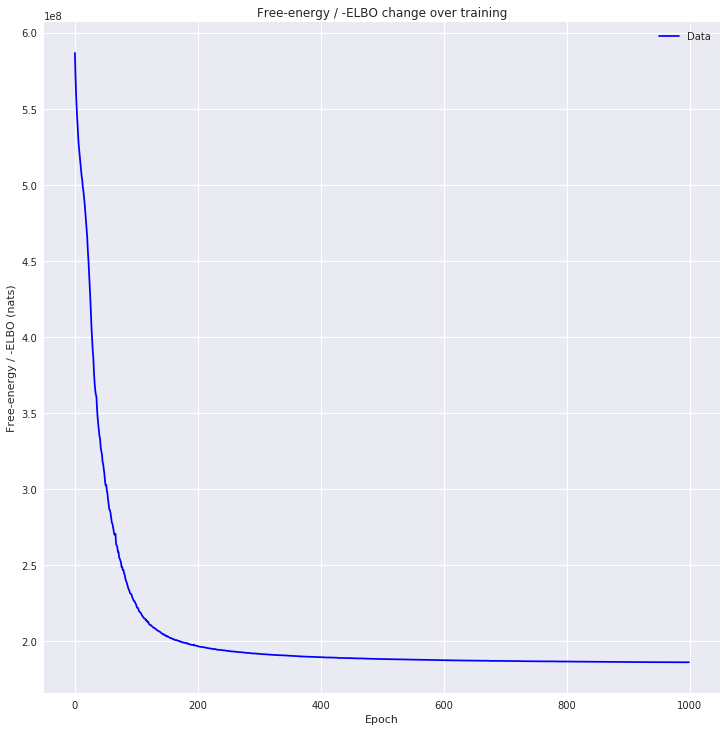

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=False, blocks_filter=lepping_db.inference_filter(training=False, held_out_tasks=set(['tones', 'response'])))

01/25/2020 04:50:23 [Epoch 1] (4784ms) Posterior free-energy 2.87138528e+08 = KL from prior 3.60797000e+05 - log-likelihood -2.86777760e+08
01/25/2020 04:50:23 Saving checkpoint...
01/25/2020 04:50:28 [Epoch 2] (4823ms) Posterior free-energy 2.70031072e+08 = KL from prior 3.57023031e+05 - log-likelihood -2.69674048e+08
01/25/2020 04:50:33 [Epoch 3] (4920ms) Posterior free-energy 2.64190432e+08 = KL from prior 3.49545125e+05 - log-likelihood -2.63840912e+08
01/25/2020 04:50:37 [Epoch 4] (4748ms) Posterior free-energy 2.73210336e+08 = KL from prior 3.47984844e+05 - log-likelihood -2.72862336e+08
01/25/2020 04:50:42 [Epoch 5] (4744ms) Posterior free-energy 2.56539328e+08 = KL from prior 3.41879719e+05 - log-likelihood -2.56197456e+08
01/25/2020 04:50:47 [Epoch 6] (4754ms) Posterior free-energy 2.59440336e+08 = KL from prior 3.42047875e+05 - log-likelihood -2.59098256e+08
01/25/2020 04:50:52 [Epoch 7] (4735ms) Posterior free-energy 2.59046384e+08 = KL from prior 3.37290750e+05 - log-likeli

01/25/2020 04:55:00 [Epoch 59] (4802ms) Posterior free-energy 1.22461424e+08 = KL from prior 2.35461438e+05 - log-likelihood -1.22225960e+08
01/25/2020 04:55:04 [Epoch 60] (4752ms) Posterior free-energy 1.21767256e+08 = KL from prior 2.34816203e+05 - log-likelihood -1.21532440e+08
01/25/2020 04:55:09 [Epoch 61] (4773ms) Posterior free-energy 1.22953464e+08 = KL from prior 2.34191594e+05 - log-likelihood -1.22719264e+08
01/25/2020 04:55:14 [Epoch 62] (4740ms) Posterior free-energy 1.18112200e+08 = KL from prior 2.33525578e+05 - log-likelihood -1.17878672e+08
01/25/2020 04:55:19 [Epoch 63] (4729ms) Posterior free-energy 1.19257448e+08 = KL from prior 2.32890781e+05 - log-likelihood -1.19024552e+08
01/25/2020 04:55:23 [Epoch 64] (4742ms) Posterior free-energy 1.15000080e+08 = KL from prior 2.31291188e+05 - log-likelihood -1.14768784e+08
01/25/2020 04:55:28 [Epoch 65] (4729ms) Posterior free-energy 1.16203824e+08 = KL from prior 2.27124641e+05 - log-likelihood -1.15976704e+08
01/25/2020 04

01/25/2020 04:59:36 [Epoch 117] (4772ms) Posterior free-energy 8.90728960e+07 = KL from prior 1.72604578e+05 - log-likelihood -8.89002880e+07
01/25/2020 04:59:41 [Epoch 118] (4842ms) Posterior free-energy 9.19373920e+07 = KL from prior 1.72525859e+05 - log-likelihood -9.17648560e+07
01/25/2020 04:59:45 [Epoch 119] (4737ms) Posterior free-energy 8.97407520e+07 = KL from prior 1.71437578e+05 - log-likelihood -8.95693120e+07
01/25/2020 04:59:50 [Epoch 120] (4740ms) Posterior free-energy 8.89152160e+07 = KL from prior 1.71883953e+05 - log-likelihood -8.87433200e+07
01/25/2020 04:59:55 [Epoch 121] (4752ms) Posterior free-energy 8.90196240e+07 = KL from prior 1.71676875e+05 - log-likelihood -8.88479360e+07
01/25/2020 05:00:00 [Epoch 122] (4778ms) Posterior free-energy 8.78155680e+07 = KL from prior 1.69962969e+05 - log-likelihood -8.76456000e+07
01/25/2020 05:00:04 [Epoch 123] (4780ms) Posterior free-energy 8.84449840e+07 = KL from prior 1.68115547e+05 - log-likelihood -8.82768720e+07
01/25/

01/25/2020 05:04:12 [Epoch 175] (4716ms) Posterior free-energy 7.80011520e+07 = KL from prior 1.42628234e+05 - log-likelihood -7.78585200e+07
01/25/2020 05:04:17 [Epoch 176] (4795ms) Posterior free-energy 7.71153120e+07 = KL from prior 1.41027359e+05 - log-likelihood -7.69742960e+07
01/25/2020 05:04:22 [Epoch 177] (4727ms) Posterior free-energy 7.75015760e+07 = KL from prior 1.41521375e+05 - log-likelihood -7.73600480e+07
01/25/2020 05:04:26 [Epoch 178] (4722ms) Posterior free-energy 7.74812800e+07 = KL from prior 1.40936516e+05 - log-likelihood -7.73403360e+07
01/25/2020 05:04:31 [Epoch 179] (4727ms) Posterior free-energy 7.72684480e+07 = KL from prior 1.40504078e+05 - log-likelihood -7.71279440e+07
01/25/2020 05:04:36 [Epoch 180] (4764ms) Posterior free-energy 7.68896800e+07 = KL from prior 1.39653391e+05 - log-likelihood -7.67500320e+07
01/25/2020 05:04:41 [Epoch 181] (4789ms) Posterior free-energy 7.70618720e+07 = KL from prior 1.40112906e+05 - log-likelihood -7.69217680e+07
01/25/

01/25/2020 05:08:48 [Epoch 233] (4764ms) Posterior free-energy 7.27519600e+07 = KL from prior 1.28430203e+05 - log-likelihood -7.26235360e+07
01/25/2020 05:08:53 [Epoch 234] (4724ms) Posterior free-energy 7.28418160e+07 = KL from prior 1.28991508e+05 - log-likelihood -7.27128240e+07
01/25/2020 05:08:58 [Epoch 235] (4794ms) Posterior free-energy 7.19273200e+07 = KL from prior 1.29058305e+05 - log-likelihood -7.17982560e+07
01/25/2020 05:09:03 [Epoch 236] (4742ms) Posterior free-energy 7.22150400e+07 = KL from prior 1.29499172e+05 - log-likelihood -7.20855360e+07
01/25/2020 05:09:08 [Epoch 237] (4785ms) Posterior free-energy 7.23266400e+07 = KL from prior 1.28419562e+05 - log-likelihood -7.21982240e+07
01/25/2020 05:09:12 [Epoch 238] (4796ms) Posterior free-energy 7.20831840e+07 = KL from prior 1.28773758e+05 - log-likelihood -7.19544080e+07
01/25/2020 05:09:17 [Epoch 239] (4753ms) Posterior free-energy 7.20836880e+07 = KL from prior 1.28887719e+05 - log-likelihood -7.19547920e+07
01/25/

01/25/2020 05:13:24 [Epoch 291] (4769ms) Posterior free-energy 6.91716240e+07 = KL from prior 1.25365758e+05 - log-likelihood -6.90462560e+07
01/25/2020 05:13:29 [Epoch 292] (4823ms) Posterior free-energy 6.95352720e+07 = KL from prior 1.25294250e+05 - log-likelihood -6.94099840e+07
01/25/2020 05:13:34 [Epoch 293] (4733ms) Posterior free-energy 6.93674560e+07 = KL from prior 1.24811914e+05 - log-likelihood -6.92426480e+07
01/25/2020 05:13:38 [Epoch 294] (4735ms) Posterior free-energy 6.93725120e+07 = KL from prior 1.25113008e+05 - log-likelihood -6.92474000e+07
01/25/2020 05:13:43 [Epoch 295] (4743ms) Posterior free-energy 6.97482640e+07 = KL from prior 1.25122914e+05 - log-likelihood -6.96231360e+07
01/25/2020 05:13:48 [Epoch 296] (4761ms) Posterior free-energy 6.94117760e+07 = KL from prior 1.25186273e+05 - log-likelihood -6.92865920e+07
01/25/2020 05:13:53 [Epoch 297] (4787ms) Posterior free-energy 6.90035840e+07 = KL from prior 1.25108789e+05 - log-likelihood -6.88784640e+07
01/25/

01/25/2020 05:18:00 [Epoch 349] (4777ms) Posterior free-energy 6.75507840e+07 = KL from prior 1.25573469e+05 - log-likelihood -6.74252080e+07
01/25/2020 05:18:05 [Epoch 350] (4777ms) Posterior free-energy 6.76168720e+07 = KL from prior 1.25906562e+05 - log-likelihood -6.74909600e+07
01/25/2020 05:18:10 [Epoch 351] (4877ms) Posterior free-energy 6.78248560e+07 = KL from prior 1.25384586e+05 - log-likelihood -6.76994640e+07
01/25/2020 05:18:14 [Epoch 352] (4773ms) Posterior free-energy 6.75961040e+07 = KL from prior 1.25625609e+05 - log-likelihood -6.74704720e+07
01/25/2020 05:18:19 [Epoch 353] (4824ms) Posterior free-energy 6.77191040e+07 = KL from prior 1.25512141e+05 - log-likelihood -6.75935840e+07
01/25/2020 05:18:24 [Epoch 354] (4818ms) Posterior free-energy 6.72787520e+07 = KL from prior 1.25456828e+05 - log-likelihood -6.71532960e+07
01/25/2020 05:18:29 [Epoch 355] (4785ms) Posterior free-energy 6.72690880e+07 = KL from prior 1.25853539e+05 - log-likelihood -6.71432400e+07
01/25/

01/25/2020 05:22:37 [Epoch 407] (4728ms) Posterior free-energy 6.64338520e+07 = KL from prior 1.27087133e+05 - log-likelihood -6.63067640e+07
01/25/2020 05:22:41 [Epoch 408] (4725ms) Posterior free-energy 6.63413720e+07 = KL from prior 1.27235328e+05 - log-likelihood -6.62141400e+07
01/25/2020 05:22:46 [Epoch 409] (4797ms) Posterior free-energy 6.64709520e+07 = KL from prior 1.27349961e+05 - log-likelihood -6.63436040e+07
01/25/2020 05:22:51 [Epoch 410] (4712ms) Posterior free-energy 6.62925760e+07 = KL from prior 1.27332820e+05 - log-likelihood -6.61652400e+07
01/25/2020 05:22:56 [Epoch 411] (4727ms) Posterior free-energy 6.65120640e+07 = KL from prior 1.27583234e+05 - log-likelihood -6.63844800e+07
01/25/2020 05:23:00 [Epoch 412] (4736ms) Posterior free-energy 6.64057720e+07 = KL from prior 1.26869734e+05 - log-likelihood -6.62789040e+07
01/25/2020 05:23:05 [Epoch 413] (4884ms) Posterior free-energy 6.61151760e+07 = KL from prior 1.27303062e+05 - log-likelihood -6.59878720e+07
01/25/

01/25/2020 05:27:13 [Epoch 465] (4778ms) Posterior free-energy 6.56908680e+07 = KL from prior 1.29911984e+05 - log-likelihood -6.55609560e+07
01/25/2020 05:27:17 [Epoch 466] (4733ms) Posterior free-energy 6.56014960e+07 = KL from prior 1.30057977e+05 - log-likelihood -6.54714360e+07
01/25/2020 05:27:22 [Epoch 467] (4733ms) Posterior free-energy 6.57785520e+07 = KL from prior 1.30811258e+05 - log-likelihood -6.56477360e+07
01/25/2020 05:27:27 [Epoch 468] (4811ms) Posterior free-energy 6.56069920e+07 = KL from prior 1.30753898e+05 - log-likelihood -6.54762400e+07
01/25/2020 05:27:32 [Epoch 469] (4730ms) Posterior free-energy 6.56369160e+07 = KL from prior 1.30465875e+05 - log-likelihood -6.55064520e+07
01/25/2020 05:27:36 [Epoch 470] (4739ms) Posterior free-energy 6.53926520e+07 = KL from prior 1.30256609e+05 - log-likelihood -6.52623920e+07
01/25/2020 05:27:41 [Epoch 471] (4800ms) Posterior free-energy 6.54775720e+07 = KL from prior 1.30427242e+05 - log-likelihood -6.53471440e+07
01/25/

01/25/2020 05:31:49 [Epoch 523] (4731ms) Posterior free-energy 6.50027640e+07 = KL from prior 1.32740953e+05 - log-likelihood -6.48700160e+07
01/25/2020 05:31:53 [Epoch 524] (4753ms) Posterior free-energy 6.50247600e+07 = KL from prior 1.34210953e+05 - log-likelihood -6.48905440e+07
01/25/2020 05:31:58 [Epoch 525] (4797ms) Posterior free-energy 6.50528920e+07 = KL from prior 1.33574516e+05 - log-likelihood -6.49193120e+07
01/25/2020 05:32:03 [Epoch 526] (4764ms) Posterior free-energy 6.50289440e+07 = KL from prior 1.33144594e+05 - log-likelihood -6.48957960e+07
01/25/2020 05:32:08 [Epoch 527] (4789ms) Posterior free-energy 6.48480560e+07 = KL from prior 1.33332094e+05 - log-likelihood -6.47147280e+07
01/25/2020 05:32:12 [Epoch 528] (4737ms) Posterior free-energy 6.50281400e+07 = KL from prior 1.32877719e+05 - log-likelihood -6.48952680e+07
01/25/2020 05:32:17 [Epoch 529] (4768ms) Posterior free-energy 6.49139080e+07 = KL from prior 1.33271844e+05 - log-likelihood -6.47806360e+07
01/25/

01/25/2020 05:36:25 [Epoch 581] (4724ms) Posterior free-energy 6.44162920e+07 = KL from prior 1.35696500e+05 - log-likelihood -6.42805920e+07
01/25/2020 05:36:30 [Epoch 582] (4781ms) Posterior free-energy 6.44454080e+07 = KL from prior 1.36115656e+05 - log-likelihood -6.43092880e+07
01/25/2020 05:36:35 [Epoch 583] (4748ms) Posterior free-energy 6.43952680e+07 = KL from prior 1.36936406e+05 - log-likelihood -6.42583320e+07
01/25/2020 05:36:40 [Epoch 584] (4842ms) Posterior free-energy 6.45385640e+07 = KL from prior 1.36341578e+05 - log-likelihood -6.44022200e+07
01/25/2020 05:36:44 [Epoch 585] (4730ms) Posterior free-energy 6.44165800e+07 = KL from prior 1.36094766e+05 - log-likelihood -6.42804800e+07
01/25/2020 05:36:49 [Epoch 586] (4722ms) Posterior free-energy 6.44041640e+07 = KL from prior 1.36850422e+05 - log-likelihood -6.42673080e+07
01/25/2020 05:36:54 [Epoch 587] (4719ms) Posterior free-energy 6.43821640e+07 = KL from prior 1.36276969e+05 - log-likelihood -6.42458960e+07
01/25/

01/25/2020 05:41:01 [Epoch 639] (4754ms) Posterior free-energy 6.42768440e+07 = KL from prior 1.39190719e+05 - log-likelihood -6.41376560e+07
01/25/2020 05:41:06 [Epoch 640] (4727ms) Posterior free-energy 6.42314160e+07 = KL from prior 1.38736516e+05 - log-likelihood -6.40926800e+07
01/25/2020 05:41:10 [Epoch 641] (4750ms) Posterior free-energy 6.40817480e+07 = KL from prior 1.38683188e+05 - log-likelihood -6.39430640e+07
01/25/2020 05:41:15 [Epoch 642] (4792ms) Posterior free-energy 6.39931680e+07 = KL from prior 1.39155625e+05 - log-likelihood -6.38540120e+07
01/25/2020 05:41:20 [Epoch 643] (4729ms) Posterior free-energy 6.42472800e+07 = KL from prior 1.38926922e+05 - log-likelihood -6.41083560e+07
01/25/2020 05:41:25 [Epoch 644] (4726ms) Posterior free-energy 6.41550040e+07 = KL from prior 1.39386109e+05 - log-likelihood -6.40156200e+07
01/25/2020 05:41:29 [Epoch 645] (4731ms) Posterior free-energy 6.41235080e+07 = KL from prior 1.39402078e+05 - log-likelihood -6.39841080e+07
01/25/

01/25/2020 05:45:37 [Epoch 697] (4757ms) Posterior free-energy 6.38147080e+07 = KL from prior 1.41827594e+05 - log-likelihood -6.36728800e+07
01/25/2020 05:45:42 [Epoch 698] (4757ms) Posterior free-energy 6.38288600e+07 = KL from prior 1.41916625e+05 - log-likelihood -6.36869440e+07
01/25/2020 05:45:47 [Epoch 699] (4794ms) Posterior free-energy 6.39334440e+07 = KL from prior 1.42440016e+05 - log-likelihood -6.37910040e+07
01/25/2020 05:45:51 [Epoch 700] (4805ms) Posterior free-energy 6.38678280e+07 = KL from prior 1.41745203e+05 - log-likelihood -6.37260800e+07
01/25/2020 05:45:56 [Epoch 701] (4789ms) Posterior free-energy 6.38266800e+07 = KL from prior 1.42266000e+05 - log-likelihood -6.36844120e+07
01/25/2020 05:45:56 Saving checkpoint...
01/25/2020 05:46:01 [Epoch 702] (4747ms) Posterior free-energy 6.37976360e+07 = KL from prior 1.42655125e+05 - log-likelihood -6.36549760e+07
01/25/2020 05:46:06 [Epoch 703] (4743ms) Posterior free-energy 6.37659240e+07 = KL from prior 1.41924219e+0

01/25/2020 05:50:13 [Epoch 755] (4724ms) Posterior free-energy 6.36845120e+07 = KL from prior 1.44657781e+05 - log-likelihood -6.35398480e+07
01/25/2020 05:50:18 [Epoch 756] (4737ms) Posterior free-energy 6.36567640e+07 = KL from prior 1.45381234e+05 - log-likelihood -6.35113760e+07
01/25/2020 05:50:22 [Epoch 757] (4736ms) Posterior free-energy 6.35370240e+07 = KL from prior 1.44375438e+05 - log-likelihood -6.33926480e+07
01/25/2020 05:50:27 [Epoch 758] (4863ms) Posterior free-energy 6.35927720e+07 = KL from prior 1.44443859e+05 - log-likelihood -6.34483240e+07
01/25/2020 05:50:32 [Epoch 759] (4742ms) Posterior free-energy 6.36230600e+07 = KL from prior 1.44261391e+05 - log-likelihood -6.34787920e+07
01/25/2020 05:50:37 [Epoch 760] (4730ms) Posterior free-energy 6.35412640e+07 = KL from prior 1.44751562e+05 - log-likelihood -6.33965120e+07
01/25/2020 05:50:42 [Epoch 761] (4783ms) Posterior free-energy 6.36449640e+07 = KL from prior 1.45342797e+05 - log-likelihood -6.34996280e+07
01/25/

01/25/2020 05:54:49 [Epoch 813] (4762ms) Posterior free-energy 6.34454560e+07 = KL from prior 1.47310453e+05 - log-likelihood -6.32981440e+07
01/25/2020 05:54:54 [Epoch 814] (4820ms) Posterior free-energy 6.34547400e+07 = KL from prior 1.46974453e+05 - log-likelihood -6.33077640e+07
01/25/2020 05:54:59 [Epoch 815] (4777ms) Posterior free-energy 6.34243040e+07 = KL from prior 1.47048500e+05 - log-likelihood -6.32772560e+07
01/25/2020 05:55:03 [Epoch 816] (4786ms) Posterior free-energy 6.34202800e+07 = KL from prior 1.47458062e+05 - log-likelihood -6.32728200e+07
01/25/2020 05:55:08 [Epoch 817] (4886ms) Posterior free-energy 6.34387760e+07 = KL from prior 1.47076453e+05 - log-likelihood -6.32917000e+07
01/25/2020 05:55:13 [Epoch 818] (4755ms) Posterior free-energy 6.34127960e+07 = KL from prior 1.46676328e+05 - log-likelihood -6.32661280e+07
01/25/2020 05:55:18 [Epoch 819] (4755ms) Posterior free-energy 6.33939480e+07 = KL from prior 1.47265078e+05 - log-likelihood -6.32466800e+07
01/25/

01/25/2020 05:59:26 [Epoch 871] (4768ms) Posterior free-energy 6.31681640e+07 = KL from prior 1.49545844e+05 - log-likelihood -6.30186200e+07
01/25/2020 05:59:30 [Epoch 872] (4770ms) Posterior free-energy 6.33000000e+07 = KL from prior 1.49351766e+05 - log-likelihood -6.31506480e+07
01/25/2020 05:59:35 [Epoch 873] (4735ms) Posterior free-energy 6.32451640e+07 = KL from prior 1.50301500e+05 - log-likelihood -6.30948680e+07
01/25/2020 05:59:40 [Epoch 874] (4748ms) Posterior free-energy 6.32237920e+07 = KL from prior 1.49800781e+05 - log-likelihood -6.30739960e+07
01/25/2020 05:59:45 [Epoch 875] (4837ms) Posterior free-energy 6.32911200e+07 = KL from prior 1.50088922e+05 - log-likelihood -6.31410360e+07
01/25/2020 05:59:49 [Epoch 876] (4763ms) Posterior free-energy 6.32594320e+07 = KL from prior 1.49357875e+05 - log-likelihood -6.31100760e+07
01/25/2020 05:59:54 [Epoch 877] (4743ms) Posterior free-energy 6.32744280e+07 = KL from prior 1.49906766e+05 - log-likelihood -6.31245120e+07
01/25/

01/25/2020 06:04:02 [Epoch 929] (4749ms) Posterior free-energy 6.30597280e+07 = KL from prior 1.51925406e+05 - log-likelihood -6.29078040e+07
01/25/2020 06:04:06 [Epoch 930] (4746ms) Posterior free-energy 6.30918760e+07 = KL from prior 1.51987750e+05 - log-likelihood -6.29398960e+07
01/25/2020 06:04:11 [Epoch 931] (4738ms) Posterior free-energy 6.30816800e+07 = KL from prior 1.51871312e+05 - log-likelihood -6.29298120e+07
01/25/2020 06:04:16 [Epoch 932] (4747ms) Posterior free-energy 6.31240160e+07 = KL from prior 1.52085359e+05 - log-likelihood -6.29719280e+07
01/25/2020 06:04:21 [Epoch 933] (4733ms) Posterior free-energy 6.31776920e+07 = KL from prior 1.52213438e+05 - log-likelihood -6.30254760e+07
01/25/2020 06:04:25 [Epoch 934] (4838ms) Posterior free-energy 6.30578280e+07 = KL from prior 1.52151969e+05 - log-likelihood -6.29056760e+07
01/25/2020 06:04:30 [Epoch 935] (4725ms) Posterior free-energy 6.29927160e+07 = KL from prior 1.51997406e+05 - log-likelihood -6.28407200e+07
01/25/

01/25/2020 06:08:38 [Epoch 987] (4731ms) Posterior free-energy 6.29857840e+07 = KL from prior 1.54321703e+05 - log-likelihood -6.28314600e+07
01/25/2020 06:08:43 [Epoch 988] (4734ms) Posterior free-energy 6.29336400e+07 = KL from prior 1.54206375e+05 - log-likelihood -6.27794280e+07
01/25/2020 06:08:48 [Epoch 989] (4735ms) Posterior free-energy 6.29116320e+07 = KL from prior 1.53364359e+05 - log-likelihood -6.27582600e+07
01/25/2020 06:08:52 [Epoch 990] (4736ms) Posterior free-energy 6.30557720e+07 = KL from prior 1.54159656e+05 - log-likelihood -6.29016120e+07
01/25/2020 06:08:57 [Epoch 991] (4825ms) Posterior free-energy 6.30091880e+07 = KL from prior 1.54443359e+05 - log-likelihood -6.28547480e+07
01/25/2020 06:09:02 [Epoch 992] (4742ms) Posterior free-energy 6.29398520e+07 = KL from prior 1.54165938e+05 - log-likelihood -6.27856840e+07
01/25/2020 06:09:07 [Epoch 993] (4725ms) Posterior free-energy 6.30073800e+07 = KL from prior 1.54718375e+05 - log-likelihood -6.28526600e+07
01/25/

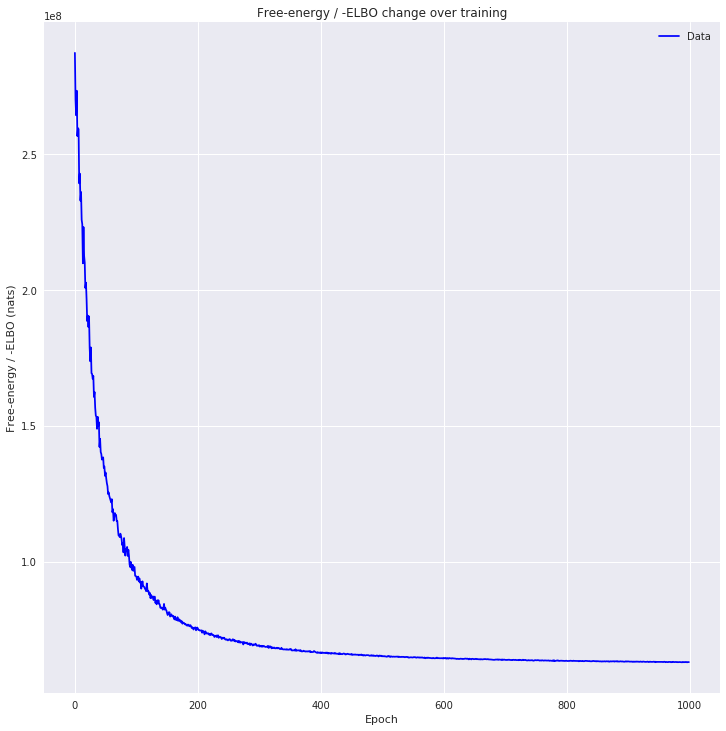

In [13]:
utils.plot_losses(losses)

In [14]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [15]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    elif task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = task.capitalize()
    return task

In [16]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.subject)
    return subject + ', ' + task + ' stimulus'

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


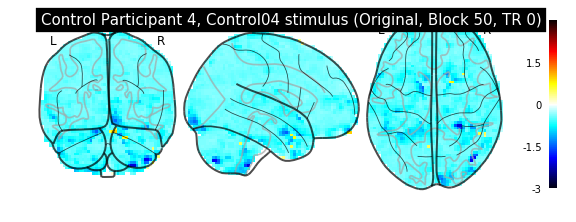

01/25/2020 06:09:44 Reconstruction Error (Frobenius Norm): 1.22037764e+01 out of 5.90596008e+02


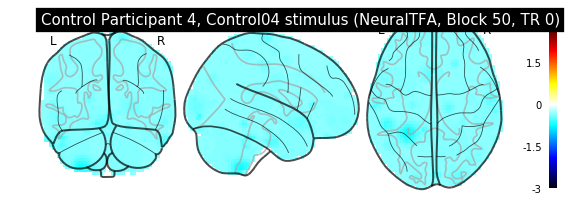

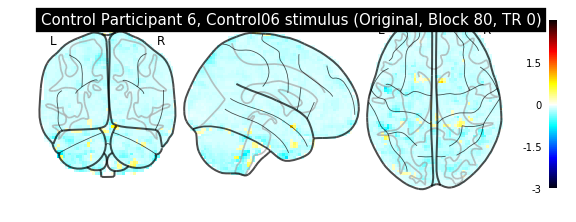

01/25/2020 06:09:48 Reconstruction Error (Frobenius Norm): 9.10241928e+01 out of 7.37048157e+02


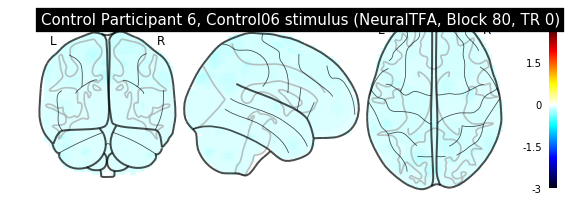

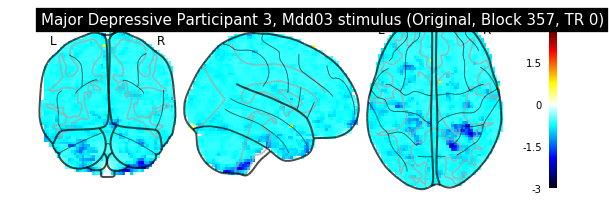

01/25/2020 06:09:53 Reconstruction Error (Frobenius Norm): 3.90554428e+01 out of 1.01188739e+03


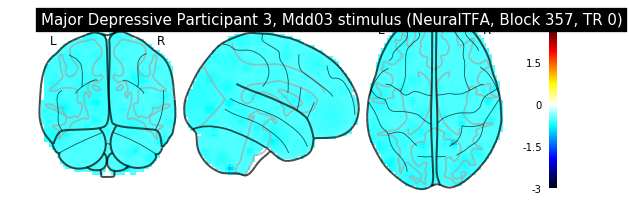

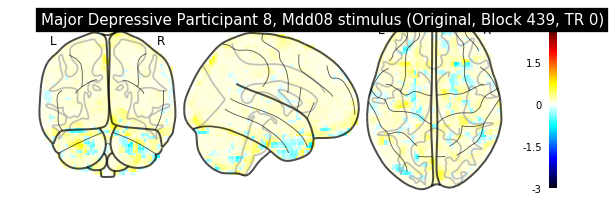

01/25/2020 06:09:57 Reconstruction Error (Frobenius Norm): 9.70769596e+00 out of 4.33035645e+02


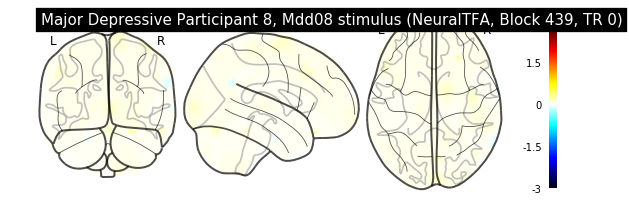

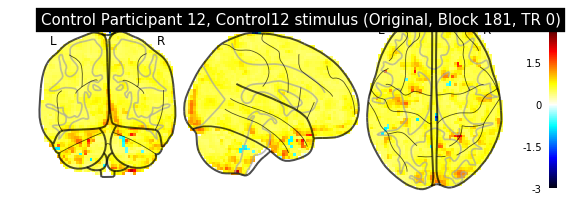

01/25/2020 06:10:02 Reconstruction Error (Frobenius Norm): 1.48731241e+01 out of 5.83740295e+02


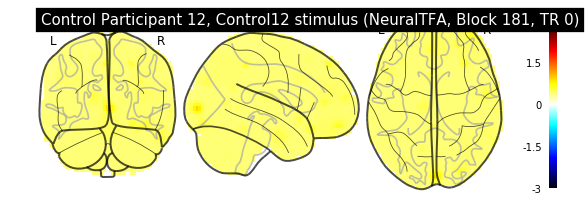

In [17]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


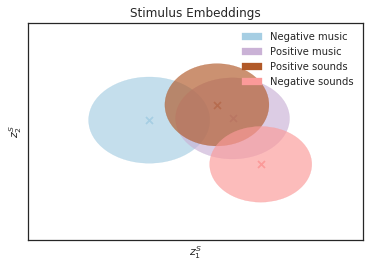

In [18]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Paired', legend_ordering=[0, 2, 3, 1])

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


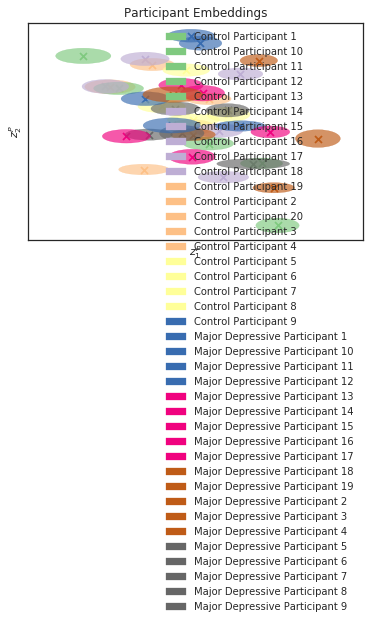

In [19]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

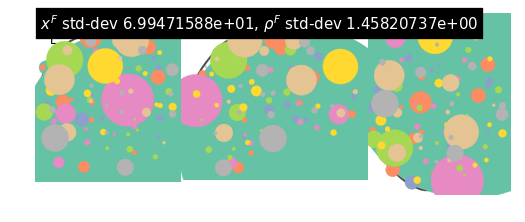

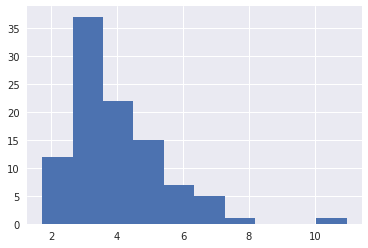

(<nilearn.plotting.displays.OrthoProjector at 0x7f06a40a62e8>,
 tensor([[-23.6745, -83.7522, -52.4272],
         [ 34.1215,  -6.2895,   4.8339],
         [-65.6007, -18.1212,  44.1600],
         [ -5.2943, -38.5988,  50.6573],
         [-14.8973,  64.2810,  -7.1667],
         [ 62.2957, -56.3403,  32.9893],
         [  1.6613,  32.2556,  64.4035],
         [-32.2204, -86.5800,  32.0820],
         [-35.2003,  16.5157, -42.2091],
         [ 45.2836, -67.8727, -25.6666],
         [ 32.7367,  10.5720, -37.3579],
         [ 46.6226,  56.6840,  23.9670],
         [-41.2865,  52.4746,  30.6796],
         [-17.7670, -45.9161, -10.7331],
         [ 52.3162,  25.3267,  34.1401],
         [ -3.3893, -89.9947,  37.8079],
         [-25.6264, -52.4855, -60.3110],
         [-38.4711, -19.1436,  10.5659],
         [-68.9301, -43.4334,  44.3602],
         [ 10.6839,  67.1351,  -4.3597],
         [ 27.7347, -38.8839, -45.1709],
         [-47.7678, -85.3686,   8.1247],
         [-18.4823, -14.4409,  76.0

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error()

01/25/2020 06:11:52 Average reconstruction error (MSE): 1.09093975e-01
01/25/2020 06:11:52 Average data norm (Euclidean): 1.10843796e+00
01/25/2020 06:11:52 Percent average reconstruction error: 0.126546


(0.10909397462878158, 1.1084379643109932, 0.001265456520039852)

In [22]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


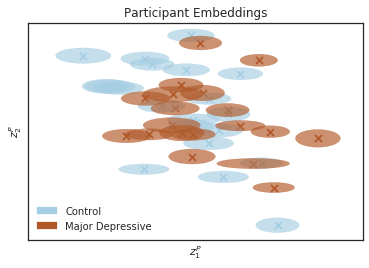

In [23]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None, colormap='Paired')

In [24]:
dtfa.average_reconstruction_error(weighted=False)

01/25/2020 06:13:38 Average reconstruction error (MSE): 8.32500189e+01 +/- 2.31430204e+01
01/25/2020 06:13:38 Average data norm (Euclidean): 8.23088863e+02 +/- 3.05424534e+02
01/25/2020 06:13:38 Percent average reconstruction error: 10.928930 +/- 3.89403344e+00


(array([ 98.32927704, 107.71179962,  90.81893921, 103.42365265,
         71.7972641 ,  69.21144867,  77.11980438,  74.33892059,
        117.2505188 , 118.87605286, 110.72777557, 120.00913239,
        103.54534912, 110.7272644 , 100.26676941, 104.06826782,
         68.75827026,  71.21939087,  72.9490509 ,  75.88833618,
         72.40934753,  76.15601349,  76.08718872,  76.27735138,
        108.36289978, 105.30850983,  99.55327606, 102.34803009,
         95.1577301 ,  99.40711212,  94.34455109,  91.83958435,
         48.24658203,  61.82480621,  48.80483246,  45.06393051,
         67.74108124,  78.75479126, 176.78189087,  72.52222443,
         97.75571442,  75.26859283,  86.95816803,  87.29271698,
         68.97776794,  83.49905396,  85.62735748,  79.11444855,
         66.17563629,  70.71257019,  67.84979248,  69.71064758,
         67.95223236,  61.83368301,  63.10614395,  63.59648132,
         79.50762177,  74.80419159,  78.39451599,  80.11790466,
         68.57433319,  68.41566467,  63.